<a href="https://colab.research.google.com/github/camayli/Aprendizaje-Automatico-I---Practica-3/blob/main/Aprendizaje_Automatico_I_%7C_Practica_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Ejercicio 1*

El aprendizaje no supervisado, y concretamente los algoritmos de clustering, pueden ser muy útiles para que las empresas tomen decisiones que aumenten sus beneficios. Vamos a estudiar el caso de un centro comercial.

In [112]:
#Importamos las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.cluster import KMeans

a) Descarga el fichero Centro_Comercial.csv del aula virtual. Contiene información de los
clientes del centro comercial. Cárgalo en Python mediante el comando de pandas
read_csv.

In [113]:
#Ejercicio 1 - A
df = pd.read_csv("Centro_Comercial.csv")

b) Muestra la información de las columnas. Deberías obtener algo similar a esto:

In [114]:
#Ejercicio 1 -B
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


c) ¿Qué significa cada uno de los datos que aparecen en la tabla anterior? ¿Qué columnas
hay? ¿Qué crees que significa el spending score? ¿Cómo se habrá conseguido?

En la tabla se muestran los datos de ID, el genero, la edad, cuánto gana al año y un spending score. Lo anterior debe hacer alguna referencia a una DB sobre estados financieros o de cliente potenciales del centro comercial

d) Muestra únicamente la información de las columnas, para obtener algo similar a:

In [115]:
#Ejercicio 1 -D
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


e) Si te das cuenta, toda la información está en inglés. Traduce los nombres de las columnas y reemplaza los datos de la columna Gender para tenerlos en español.

In [116]:
#Ejercicio 1 - E
#Remplazo nombres de columnas
df = df.rename(columns={
    "CustomerID": "ID",
    "Gender": "Género",
    "Age": "Edad",
    "Annual Income (k$)": "Salario anual (K)",
    "Spending Score (1-100)": "Puntuación de gasto (1-100)"
})
#Remplazo genero
df["Género"] = df["Género"].replace({"Male": "Hombre", "Female": "Mujer"})

f) Muestra los datos de las 8 primeras personas de la base de datos, obteniendo algo similar a lo siguiente:

In [117]:
#Ejercicio 1 - F
# Mostrar las primeras filas
print(df.head(8))

   ID  Género  Edad  Salario anual (K)  Puntuación de gasto (1-100)
0   1  Hombre    19                 15                           39
1   2  Hombre    21                 15                           81
2   3   Mujer    20                 16                            6
3   4   Mujer    23                 16                           77
4   5   Mujer    31                 17                           40
5   6   Mujer    22                 17                           76
6   7   Mujer    35                 18                            6
7   8   Mujer    23                 18                           94


g) Muestra las dimensiones del dataset. ¿Cuántas filas hay? ¿Cuántos atributos?

In [118]:
print(df.shape)

(200, 5)


h) Muestra los estadísticos básicos. Deberías obtener una tabla como la siguiente

In [119]:
print(df.describe())

               ID        Edad  Salario anual (K)  Puntuación de gasto (1-100)
count  200.000000  200.000000         200.000000                   200.000000
mean   100.500000   38.850000          60.560000                    50.200000
std     57.879185   13.969007          26.264721                    25.823522
min      1.000000   18.000000          15.000000                     1.000000
25%     50.750000   28.750000          41.500000                    34.750000
50%    100.500000   36.000000          61.500000                    50.000000
75%    150.250000   49.000000          78.000000                    73.000000
max    200.000000   70.000000         137.000000                    99.000000


i) ¿Qué significan los datos? Interprétalos e intenta sacar alguna conclusión (o indicio), a
partir de ellos.


Podemos deducir que se tienen 200 muestras con una media de los usuarios de 38 años, un salario anual de 60.560 y una puntuacion media de la muestra de 50.2.
Siendo que la edad minima es de 18 y maxima de 70 de los usuarios, en cuanto a salario el minimo alarial es 15000 y el maximo salarial es de 137000 y una puntuacion de gasto minima de 1 y maxima de 99. Se podria concluir que ha mayor edad hay mayores ingresos.

j) Comprueba si hay algún elemento nulo entre los datos. Comprueba también si hay algún dato erróneo, por ejemplo, que haya alguna edad, salario o puntuación negativa

In [120]:
#Ejercicio 1 - J

#Comprobar si hay valores nulos
print(df.isnull().sum())

#Comprobar valores negativos por columna
Negativos_edad = (df["Edad"] < 0).any()
Negativos_salario = (df["Salario anual (K)"] < 0).any()
Negativos_puntuacion = (df["Puntuación de gasto (1-100)"] < 0).any()
if Negativos_edad < 0:
  print(Negativos_edad)
elif Negativos_salario < 0:
  print(Negativos_salario)
elif Negativos_puntuacion < 0:
  print(Negativos_puntuacion)
else:
  print("- Ninguna edad, salario anual (K) y puntuación de gasto (1-100)")

ID                             0
Género                         0
Edad                           0
Salario anual (K)              0
Puntuación de gasto (1-100)    0
dtype: int64
- Ninguna edad, salario anual (K) y puntuación de gasto (1-100)


k) Muestra el histograma (por ejemplo, con histplot de Seaborn) de la distribución del
salario y de la edad. Hazlo en una única figura (es decir, utiliza subfiguras) e intenta que
visualmente quede atractivo. Intenta conseguir lo siguiente:

Text(0, 0.5, 'Frecuencia')

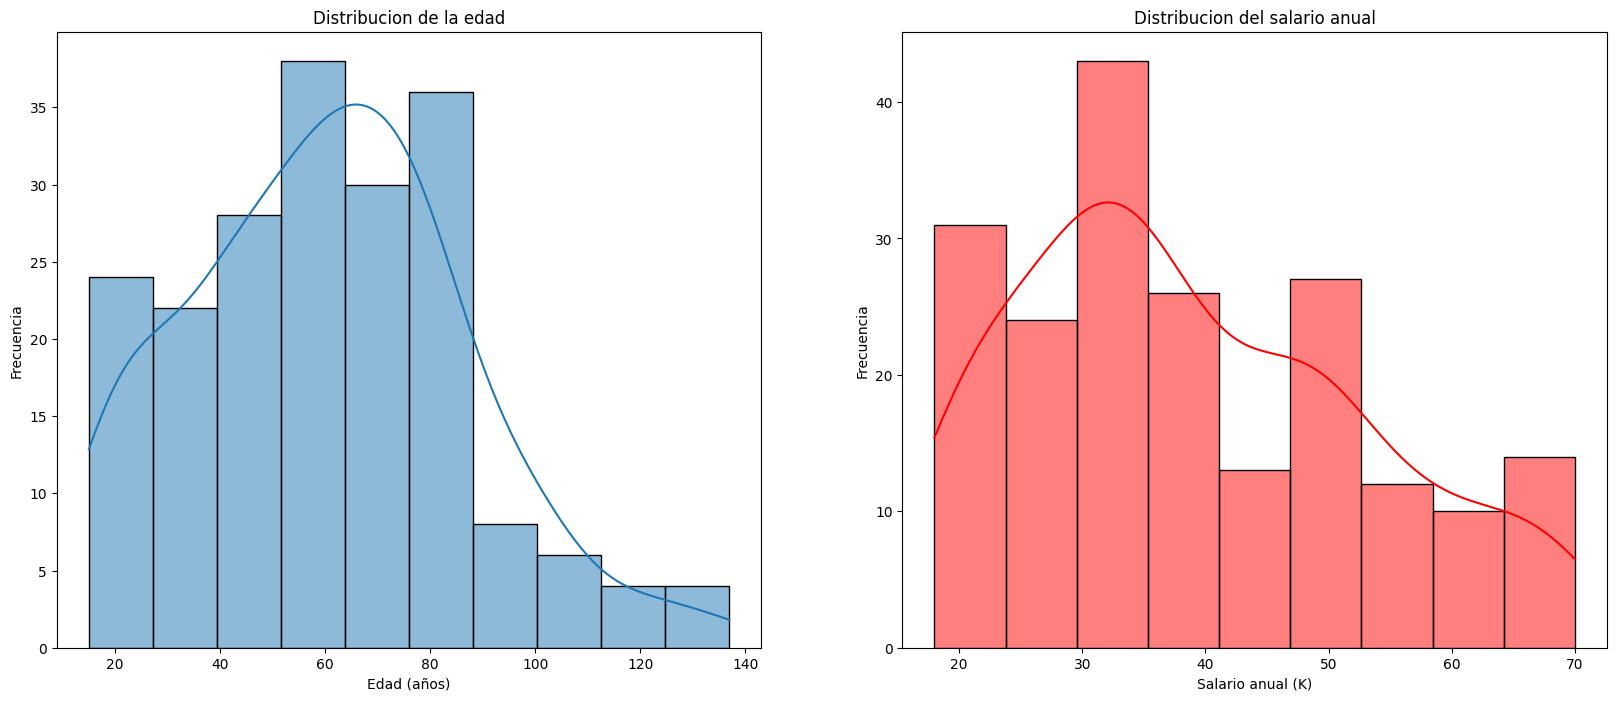

In [121]:
#Ejercicio 1 - K
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

C_Edad = "Edad"
C_Sal  = "Salario anual (K)"

#Grafico de Salario
sns.histplot(df[C_Sal], kde=True, ax=axes[0])

axes[1].set_title("Distribucion del salario anual")
axes[1].set_xlabel("Salario anual (K)")
axes[1].set_ylabel("Frecuencia")

#Grafico de distribucion de edad
sns.histplot(df[C_Edad], kde=True, ax=axes[1], color="red")
axes[0].set_title("Distribucion de la edad")
axes[0].set_xlabel("Edad (años)")
axes[0].set_ylabel("Frecuencia")

l) Interpreta los datos. ¿Qué significan los histogramas? ¿Puedes decir ya algo?

Los histogramas muestran cómo se reparten los valores de cada variable. Ahí se ve qué rangos son los más comunes y cómo se comportan los clientes. Con eso ya se nota que hay diferencias claras entre grupos, aunque todavía no se puede sacar una conclusión final.Por ejemplo la relacion salario y edad.

m) Haz lo mismo, pero para la puntuación. Pon que haya 10 columnas. Interpreta lo que ves por pantalla.

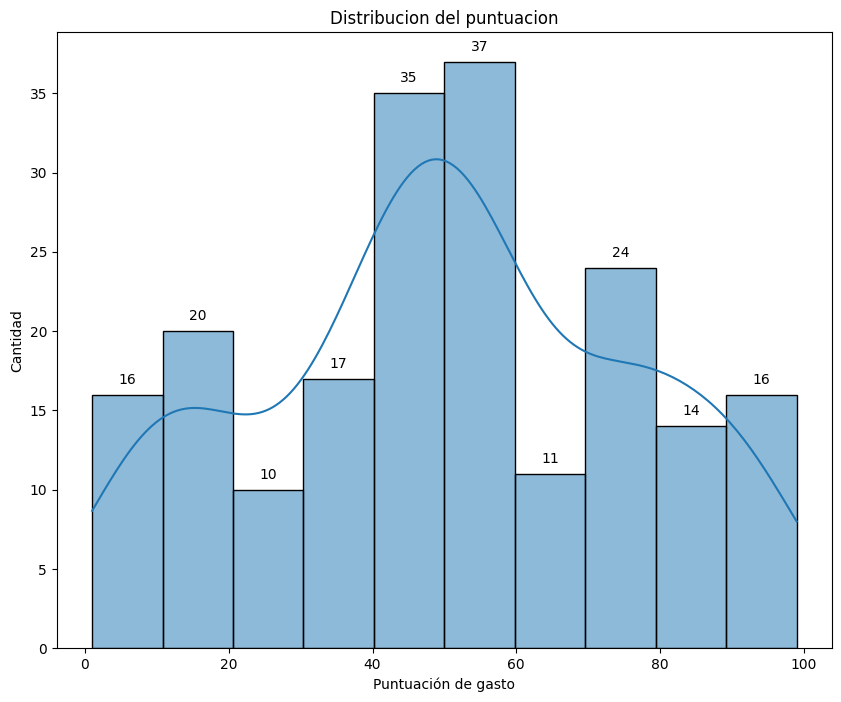

In [122]:
#Ejercicio 1 - M
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
C_puntos =  "Puntuación de gasto (1-100)"

#Grafico de Salario
sns.histplot(df[C_puntos], kde=True, bins=10, ax=ax)
for patch in ax.patches:
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width() / 2,
        height + 0.5,
        int(height),
        ha='center', va='bottom', fontsize=10
    )
ax.set_title("Distribucion del puntuacion")
ax.set_xlabel("Puntuación de gasto")
ax.set_ylabel("Cantidad")
plt.show()

n) Intenta conseguir el siguiente gráfico (pie), incluyendo la leyenda.

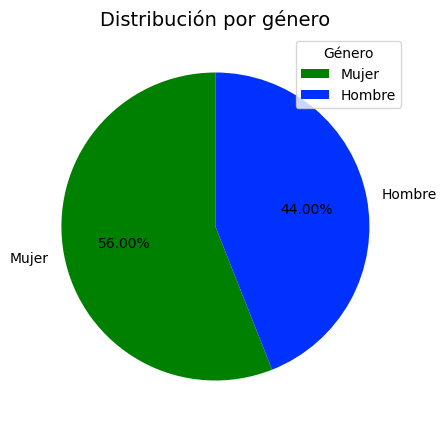

In [123]:
columna_genero = "Género"

# Calcular la cantidad y el porcentaje de cada categoría
conteo_genero = df[columna_genero].value_counts()
porcentaje_genero = conteo_genero / conteo_genero.sum() * 100

# Definir colores para cada grupo
colores = ['#008000', '#0031ff']

fig, ax = plt.subplots(figsize=(5, 5))

# Crear gráfico de pastel
partes, etiquetas, porcentajes = ax.pie(
    conteo_genero,
    labels=conteo_genero.index,
    autopct='%1.2f%%',#formato del porcentaje
    colors=colores, #colores definidos
    startangle=90, #comienza desde la parte superior
)

# Título y leyenda
ax.set_title("Distribución por género", fontsize=14)
ax.legend(conteo_genero.index, title="Género", loc="upper right")

# Mostrar el gráfico
plt.show()

o) Muestra cuántas personas hay con cada edad mediante un gráfico (countplot).

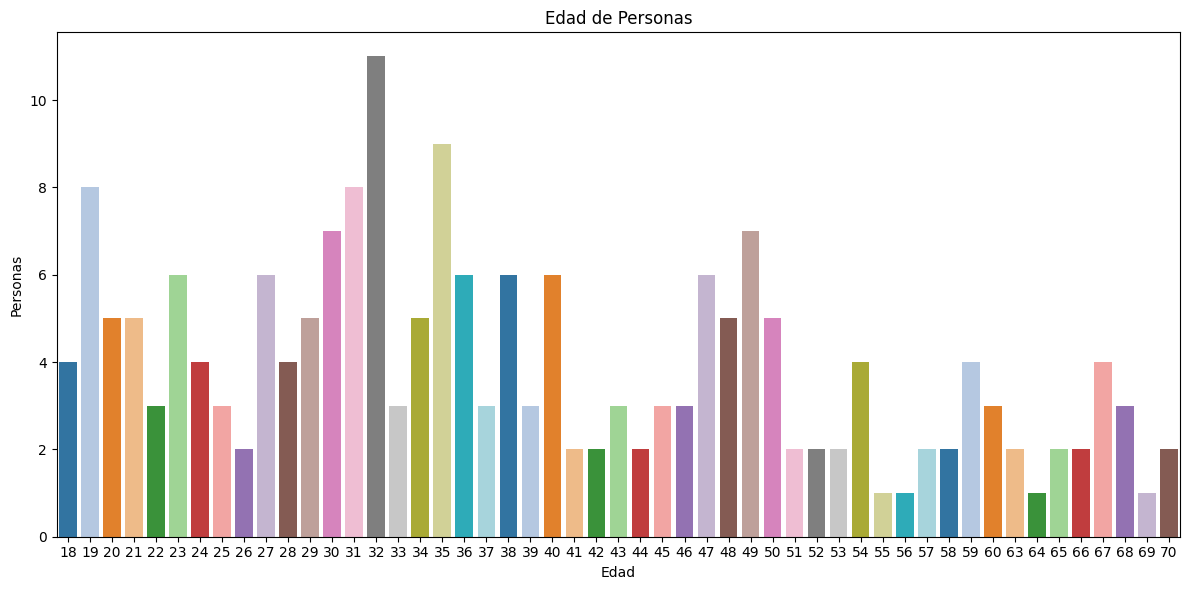

In [124]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x=C_Edad, hue=C_Edad, palette="tab20", legend=False)
plt.title("Edad de Personas")
plt.xlabel("Edad")
plt.ylabel("Personas")
plt.tight_layout()
plt.show()

p) Haz lo mismo para la puntuación y para el salario.

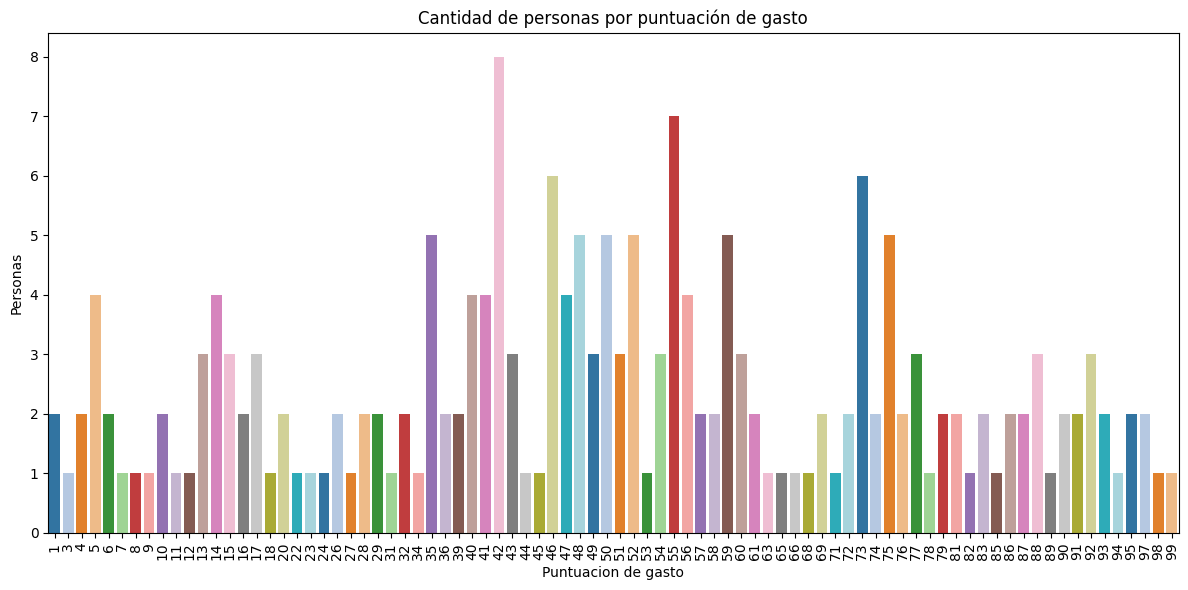

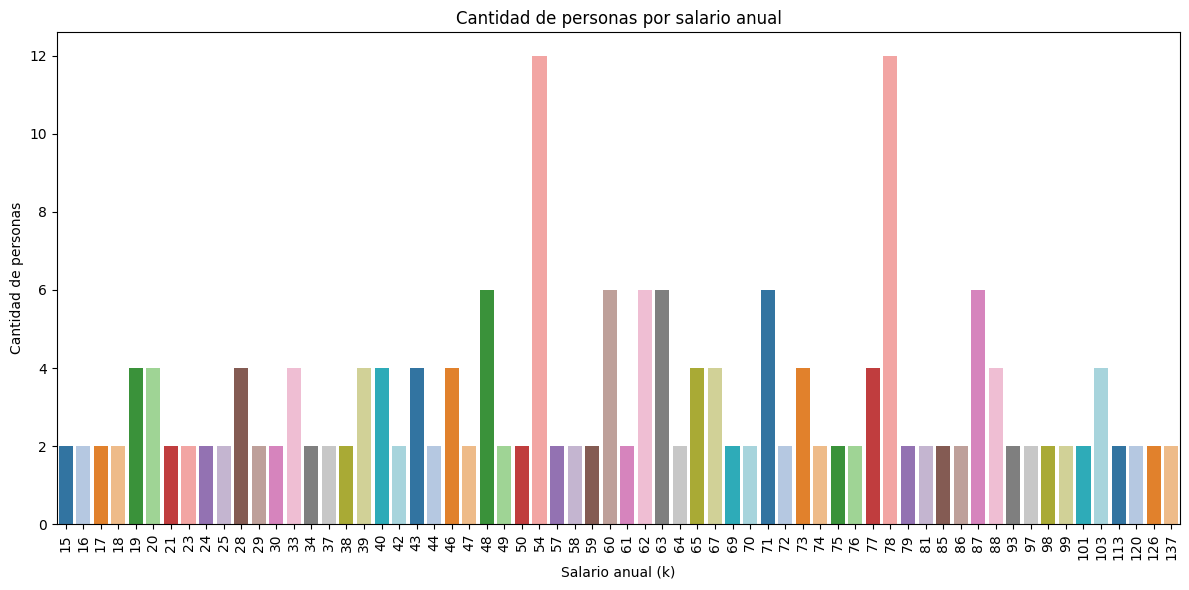

In [125]:
#Puntuacion
C_Puntuacion = "Puntuación de gasto (1-100)"
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x=C_Puntuacion, hue=C_Puntuacion, palette="tab20", legend=False)
plt.title("Cantidad de personas por puntuación de gasto")
plt.xlabel("Puntuacion de gasto")
plt.ylabel("Personas")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
print("\n")

#Annual Income (k$)
C_Salario = "Salario anual (K)"
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x=C_Salario, hue=C_Salario, palette="tab20", legend=False)
plt.title("Cantidad de personas por salario anual")
plt.xlabel("Salario anual (k)")
plt.ylabel("Cantidad de personas")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

q) Muestra el pairplot de todas las variables y analiza lo que ves. ¿Qué significa cada cosa?
¿Puedes sacar alguna conclusión o indicio a partir de los gráficos?

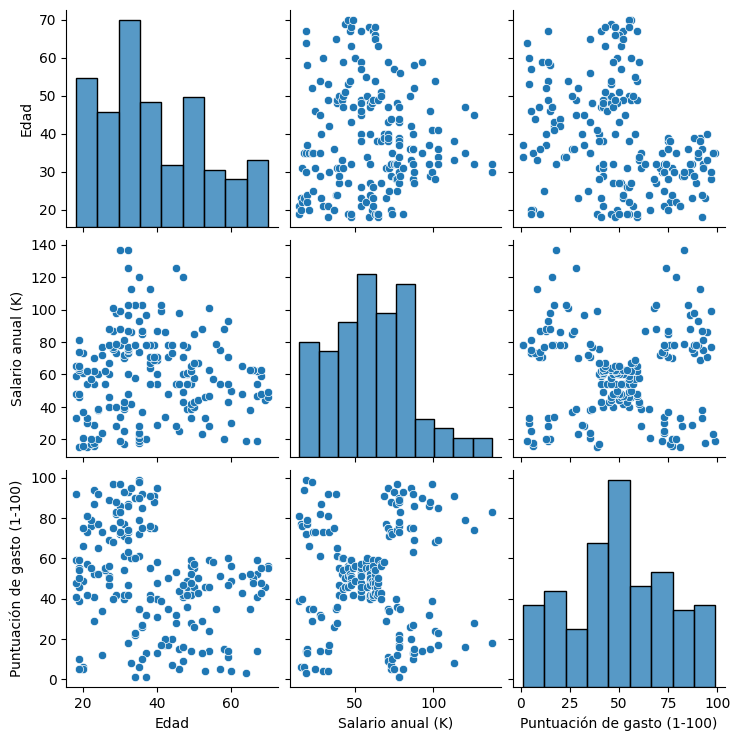

In [126]:
columnas_numericas = ["Edad", "Salario anual (K)", "Puntuación de gasto (1-100)"]
sns.pairplot(df[columnas_numericas])
plt.show()

r) Crea un mapa de calor de los datos e interprétalo.

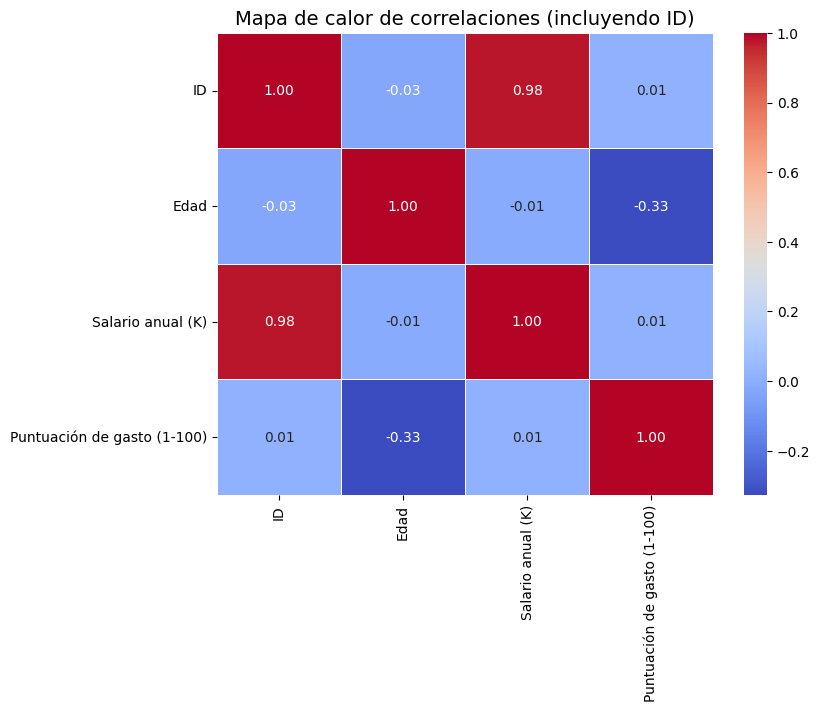

In [127]:
# Seleccionar todas las columnas numéricas, incluyendo ID
columnas_numericas = ["ID", "Edad", "Salario anual (K)", "Puntuación de gasto (1-100)"]

# Calcular la matriz de correlación
corr = df[columnas_numericas].corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de correlaciones (incluyendo ID)", fontsize=14)
plt.show()

s) ¿Nos interesa el atributo ID? ¿Por qué está tan correlado con el salario anual?

No es de interes porque lo usamos solo como key o identificador. La correlación alta con el salario aparece porque el ID está ordenado y aumenta de forma parecida al salario, pero no es una relación real.

In [128]:
df.head()

,ID,Género,Edad,Salario anual (K),Puntuación de gasto (1-100)
0,1,Hombre,19,15,39
1,2,Hombre,21,15,81
2,3,Mujer,20,16,6
3,4,Mujer,23,16,77
4,5,Mujer,31,17,40


t) Muestra una trama de violín e intenta interpretar lo que ves.

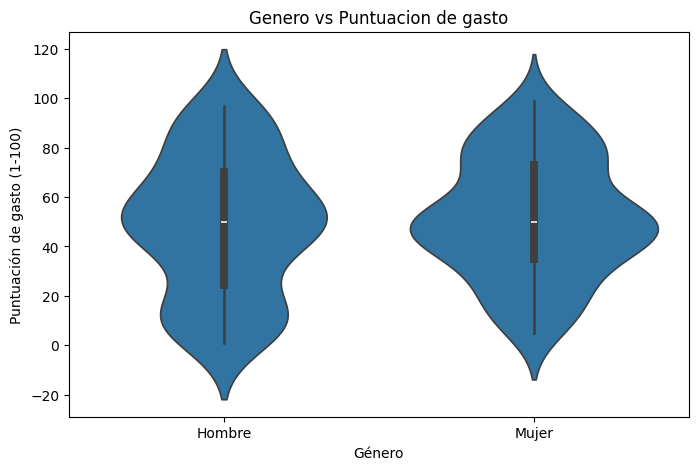

In [129]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Género',
               y='Puntuación de gasto (1-100)',
               data=df)

plt.title('Genero vs Puntuacion de gasto')
plt.xlabel('Género')
plt.ylabel('Puntuación de gasto (1-100)')
plt.show()

u) Muestra un stripplot para comparar género y edad. ¿Puedes interpretar algo?

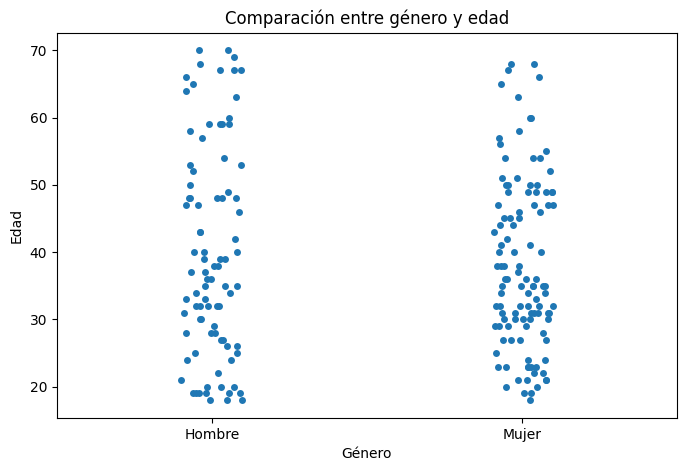

In [130]:
plt.figure(figsize=(8,5))
sns.stripplot(x='Género',
              y='Edad',
              data=df,
              jitter=True)

plt.title('Comparación entre género y edad')
plt.xlabel('Género')
plt.ylabel('Edad')
plt.show()

Se ve una cantidad mas significativa de mujeres sobre los 30 y45 que en los hombres.

v) Mediante lineplot, muestra el salario vs la edad y la puntuación. Cuidado, en este caso
no queremos mostrar dos gráficos distintos, sino unirlos en el mismo con los mismos
ejes.

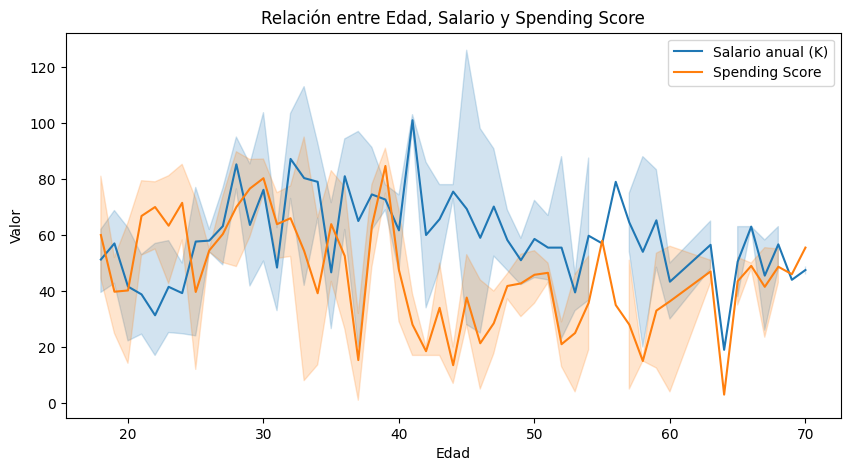

In [131]:
plt.figure(figsize=(10,5))

sns.lineplot(x='Edad', y='Salario anual (K)', data=df, label='Salario anual (K)')
sns.lineplot(x='Edad', y='Puntuación de gasto (1-100)', data=df, label='Spending Score')

plt.title('Relación entre Edad, Salario y Spending Score')
plt.xlabel('Edad')
plt.ylabel('Valor')
plt.legend()
plt.show()

w) ¿Qué significa la raya azul, la rosa, y los fondos difusos?

La raya azul muestra cómo cambia el salario con la edad, la rosa muestra cómo cambia la puntuación de gasto, y las zonas difusas alrededor indican la variación o incertidumbre de cada línea.

x) Parece sensato quedarnos con el salario y la puntuación de gasto para comparar. Aplica
el KMeans a esos datos (tendrás que usar el comando iloc para quedarte con ellos), con
5 clústers (ya veremos cómo sacar el número óptimo de clústers)

y) Visualiza lo obtenido en un gráfico, pintando también los baricentros. En el siguiente
ejemplo lo he pintado usando matplotlib (con scatter), pero puedes hacerlo también
con seaborn (con scatterplot).

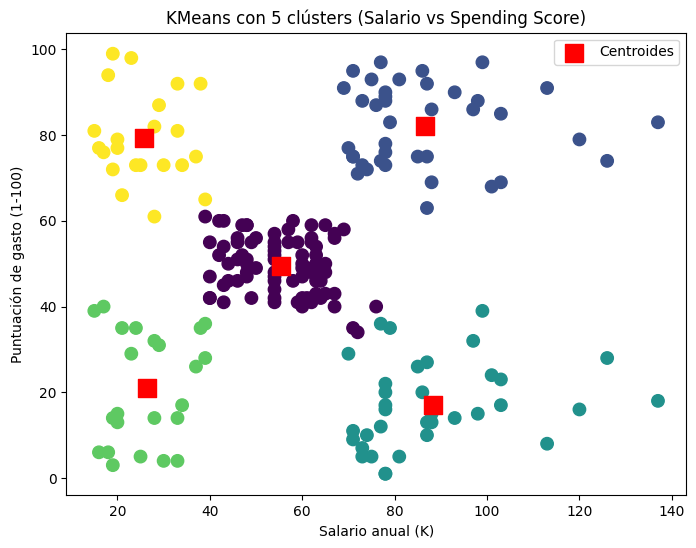

In [132]:
# Seleccionamos salario y puntuación
X = df.iloc[:, [3, 4]].values

# Modelo con 5 clústers
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Dibujamos los puntos por clúster
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y_kmeans, s=80, cmap='viridis')

# Dibujamos los baricentros
plt.scatter(kmeans.cluster_centers_[:,0],
            kmeans.cluster_centers_[:,1],
            s=150,
            c='red',
            marker='s',
            label='Centroides')

plt.xlabel("Salario anual (K)")
plt.ylabel("Puntuación de gasto (1-100)")
plt.title("KMeans con 5 clústers (Salario vs Spending Score)")
plt.legend()
plt.show()

z) Como ves, el algoritmo te ha separado en 5 grupos. Interpreta los clústers. Con toda la
información obtenida, si fueses el (o la) gerente del centro comercial, ¿qué conclusiones
sacas y qué decisiones tomarías?

Al dividirlo en 5 cluster podemos observar la relacion de gasto y salario, en la cual no hay una tendencia ya que sin importar el salario hay gastos elevados y bajos. Si yo fuera el gerente, usaría esto para hacer campañas para motivar a los que tienen alto salario pero bajo gasto y dar una memebresia para mantener felices a los que gastan altos valores.

# Ejercicio 2

En este ejercicio, vamos a usar de nuevo el dataset de los números escritos a mano (MNIST). Al
estilo de la primera práctica, vamos a hacer una mezcla de aprendizaje supervisado y no
supervisado. Concretamente, haremos varias cosas:


a)  Importamos las librerias



In [133]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from collections import Counter
from sklearn.metrics import homogeneity_score, accuracy_score

b) Importa desde la librería Keras el dataset. Para ello simplemente tienes que hacer:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
Como es un dataset pensado para aprendizaje supervisado, contiene 2 grupos de
imágenes (entrenamiento y testing), que a su vez se pueden dividir en dos partes (la x,
que son los datos, y las y, que contienen la etiqueta).


In [134]:
# x_train: imagenes de entrenamiento
# y_train: etiquetas de entrenamiento
(x_train, y_train), (x_test, y_test) = mnist.load_data()

c) Muestra las dimensiones de los conjuntos de entrenamiento y test.

In [135]:
print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test :", x_test.shape)
print("y_test :", y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test : (10000, 28, 28)
y_test : (10000,)


Hay 60000 imagenes, 10000 test y elementos 28x28

d) Mostrar las 12 primeras imágenes en una figura.
Usa el comando ax.matshow para mostrar cada imagen. Si eliminas los ejes y muestras
la etiqueta correspondiente para cada imagen, podrás conseguir algo así:

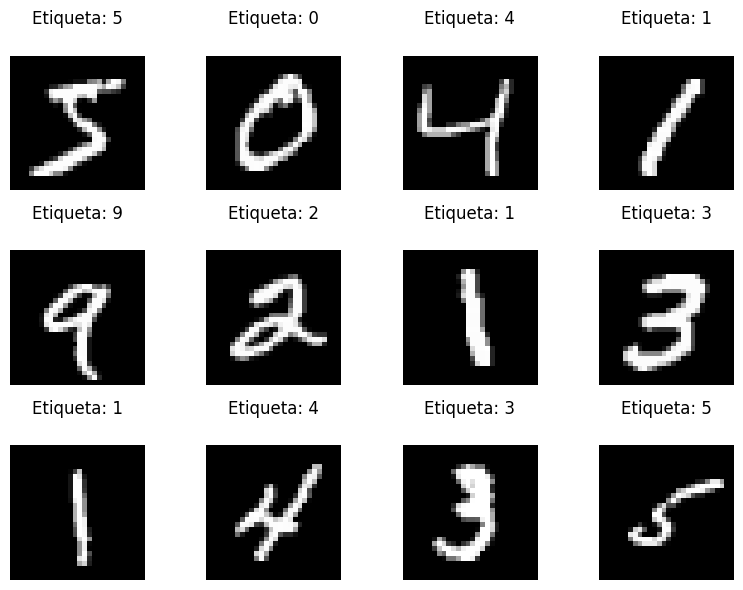

In [136]:
fig, axs = plt.subplots(3, 4, figsize=(8, 6))

for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i], cmap="gray")
    ax.set_title(f"Etiqueta: {y_train[i]}")
    ax.axis("off")

plt.tight_layout()
plt.show()

e) En casi todos los algoritmos de clustering, cada dato (cada “línea” del dataset) debe ser
un array 1-dimensional. Sin embargo, en este caso cada imagen es una matriz de 28x28,
con valores entre 0 y 255 (escala de grises). Convierte todas las imágenes a un array 1-
dimensional. ¿Qué dimensión tendrá que tener? Consejo: usa el comando reshape.

In [137]:
X_train = x_train.reshape((x_train.shape[0], -1))
X_test  = x_test.reshape((x_test.shape[0], -1))

print("Nueva forma de X_train:", X_train.shape)
print("Nueva forma de X_test :", X_test.shape)

Nueva forma de X_train: (60000, 784)
Nueva forma de X_test : (10000, 784)


Se esperaria que la cadena de cada elemento 28x28 con un total de 784 como se muestra

f) Como hemos dicho, tenemos los datos entre 0 y 255. Normalízalos para que estén entre
0 y 1.

In [138]:
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32") / 255.0

g) Muestra la dimensión de las imágenes, en el grupo de entrenamiento debería haber
60000 imágenes que ahora están codificadas cada una en un array de 784 elementos
entre 0 y 1.

In [139]:
print("X_train:", X_train.shape)
print("X_test :", X_test.shape)

X_train: (60000, 784)
X_test : (10000, 784)


h) Vamos a empezar a hacer clustering. Seguramente nos interese separar en 10 grupos,
porque se supone que hay 10 números. ¿Pero realmente el dataset contiene 10
etiquetas diferentes? Por ejemplo, en el gráfico anterior no salen los números 7 ni 8.
Comprueba que sí que hay 10 etiquetas distintas, para ello usa np.unique sobre las
etiquetas para que cuente el número de etiquetas distintas. Puedes también mostrarlas
para ver que realmente son números entre 0 y 9.


In [140]:
etiquetas_unicas = np.unique(y_train)
print("Etiquetas distintas en train:", etiquetas_unicas)
print("Numero de etiquetas distintas:", len(etiquetas_unicas))

Etiquetas distintas en train: [0 1 2 3 4 5 6 7 8 9]
Numero de etiquetas distintas: 10


Si hay etiquetas de 0 a 10

i) Aplica clustering (puedes usar el algoritmo KMeans, o mejor aún, el MiniBatchKMeans,
que es una modificación del anterior pero más rápido). Especifica que haya 10 clusters.

In [141]:
n_clusters = 10

kmeans = MiniBatchKMeans(
    n_clusters=n_clusters,
    random_state=0,
    batch_size=1024
)

kmeans.fit(X_train)
cluster_train = kmeans.labels_

j) El algoritmo de clustering K-means (y sus variantes) es un método de aprendizaje no supervisado. De esta forma, las etiquetas (la separación en clusters) que ha asignado a cada clúster son números (clúster 1, clúster 2, etc), pero puede que no coincida con el número que realmente representa (por ejemplo, el clúster 1 que ha generado nuestro KMeans puede que contenga una mayoría de imágenes que estuviesen etiquetadas con un 7, es decir, que fuesen el número 7). Define funciones para modificar las etiquetas asignadas a los clusters para que coincidan con la etiqueta que más veces se repita
dentro de los datos de esas imágenes. COMENTARIO IMPORTANTE: Hay varias
opciones para hacer esto.

In [142]:
def map_clusters_to_labels(y_true, cluster_labels):
  mapping = {}
  for c in np.unique(cluster_labels):
    indices = np.where(cluster_labels == c)[0]
    etiquetas_cluster = y_true[indices]
    mas_comun = Counter(etiquetas_cluster).most_common(1)[0][0]
    mapping[c] = mas_comun
  return mapping

cluster_to_label = map_clusters_to_labels(y_train, cluster_train)
y_train_pred = np.array([cluster_to_label[c] for c in cluster_train])

La funcion principal se basa en evaluar el elemnto que mas se repita en el algoritmo para tomarlo como punto de partida del cluster

k) Comprueba si sigues teniendo 10 clusters. Realmente, no tendría por qué ser así. ¿Por qué podría pasar que tuvieses ahora menos de 10 clústers?

In [143]:
print("Clusters encontrados (sin mapeo):", np.unique(cluster_train))
print("Etiquetas finales usadas (tras mapeo):", np.unique(y_train_pred))

Clusters encontrados (sin mapeo): [0 1 2 3 4 5 6 7 8 9]
Etiquetas finales usadas (tras mapeo): [0 1 2 3 4 6 7]


Se ve que reorganiza a pesar de los 10 cluster sobre 7 elementos a dos cluster, logrando que queden 7 elementos.

l) Del paquete sklearn importa metrics. Crea una función para calcular y mostrar distintas métricas, concretamente la inertia, homogeneidad (homogeneity_score) y la precisión (accuracy_score). Busca brevemente lo que significa cada una.

In [144]:
def evaluar_modelo(y_true, cluster_labels, y_pred_labels, modelo):
  inertia = modelo.inertia_
  hom     = homogeneity_score(y_true, cluster_labels)
  acc     = accuracy_score(y_true, y_pred_labels)

  print(f"Inercia: {inertia}")
  print(f"Homogeneidad: {hom}")
  print(f"Accuracy (porcentaje de acierto): {acc}")

  return inertia, hom, acc

inertia_train, hom_train, acc_train = evaluar_modelo(
    y_train, cluster_train, y_train_pred, kmeans
)

Inercia: 2375183.0
Homogeneidad: 0.4838670351352071
Accuracy (porcentaje de acierto): 0.5805833333333333


Inercia = Es la suma de cluster a cluster

Homogeneidad = Porcerntaje de elementos de un mismo cluster

Precision (Accuracy) = Validacion aciertos y etiquetas reales

m) Muestra por pantalla los datos de evaluación que obtienes, aplicando tu modelo a los datos de entrenamiento. ¿Qué tal son? Seguramente obtengas un porcentaje de alrededor del 50% de acierto.

Correcto se obtuvo un 58% de presicion

n) ¿Tiene sentido aumentar el número de clusters? ¿Mejorarán los datos? ¿Qué pasa realmente? Pruébalo y muestra los datos de evaluación que obtienes con distinto número de clusters. Aquí influirá cómo has decidido hacer el apartado j).

In [145]:
# K = 15
k15 = MiniBatchKMeans(
    n_clusters=15,
    random_state=0,
    batch_size=1024
)
k15.fit(X_train)

clusters_15 = k15.labels_
mapping_15 = map_clusters_to_labels(y_train, clusters_15)
y_train_pred_15 = np.array([mapping_15[c] for c in clusters_15])

inercia_15 = k15.inertia_
homogeneidad_15 = metrics.homogeneity_score(y_train, clusters_15)
accuracy_15 = metrics.accuracy_score(y_train, y_train_pred_15)

print("K = 15")
print(f"Inercia: {inercia_15}")
print(f"Homogeneidad: {homogeneidad_15}")
print(f"Accuracy (porcentaje de acierto): {accuracy_15}")


# K = 18
k18 = MiniBatchKMeans(
    n_clusters=18,
    random_state=0,
    batch_size=1024
)
k18.fit(X_train)

clusters_18 = k18.labels_
mapping_18 = map_clusters_to_labels(y_train, clusters_18)
y_train_pred_18 = np.array([mapping_18[c] for c in clusters_18])

inercia_18 = k18.inertia_
homogeneidad_18 = metrics.homogeneity_score(y_train, clusters_18)
accuracy_18 = metrics.accuracy_score(y_train, y_train_pred_18)

print("K = 18")
print(f"Inercia: {inercia_18}")
print(f"Homogeneidad: {homogeneidad_18}")
print(f"Accuracy (porcentaje de acierto): {accuracy_18}")


# K = 20
k20 = MiniBatchKMeans(
    n_clusters=20,
    random_state=0,
    batch_size=1024
)
k20.fit(X_train)

clusters_20 = k20.labels_
mapping_20 = map_clusters_to_labels(y_train, clusters_20)
y_train_pred_20 = np.array([mapping_20[c] for c in clusters_20])

inercia_20 = k20.inertia_
homogeneidad_20 = metrics.homogeneity_score(y_train, clusters_20)
accuracy_20 = metrics.accuracy_score(y_train, y_train_pred_20)

print("K = 20")
print(f"Inercia: {inercia_20}")
print(f"Homogeneidad: {homogeneidad_20}")
print(f"Accuracy (porcentaje de acierto): {accuracy_20}")

K = 15
Inercia: 2242020.0
Homogeneidad: 0.5421578143110916
Accuracy (porcentaje de acierto): 0.6264833333333333
K = 18
Inercia: 2163617.0
Homogeneidad: 0.5692422024156032
Accuracy (porcentaje de acierto): 0.6504666666666666
K = 20
Inercia: 2135297.5
Homogeneidad: 0.589957858668861
Accuracy (porcentaje de acierto): 0.6825


Ya elevando o duplicando el K se empieza a ver resultados de precision mayores

o) Prueba con los datos de test para saber realmente cómo de bueno es tu modelo.

In [146]:
cluster_test = kmeans.predict(X_test)

y_test_pred = np.array([cluster_to_label[c] for c in cluster_test])

inertia_test = kmeans.inertia_
hom_test = homogeneity_score(y_test, cluster_test)
acc_test = accuracy_score(y_test, y_test_pred)

print("Resultados en test")
print(f"Homogeneidad (test): {hom_test:.4f}")
print(f"Accuracy (test): {acc_test:.4f}")

Resultados en test
Homogeneidad (test): 0.4954
Accuracy (test): 0.5847


p) Muestra los baricentros de cada clúster junto con la etiqueta que ha deducido para ese clúster. Para poderlo mostrar, deberás ahora convertir el array de 784 componentes a una matriz de 28x28, de nuevo con el comando reshape. Por ejemplo, si lo hacemos con 25 clusters, tendremos que los baricentros son los siguientes. ¿Podría pasar que se haya deducido mal la etiqueta correspondiente del clúster?

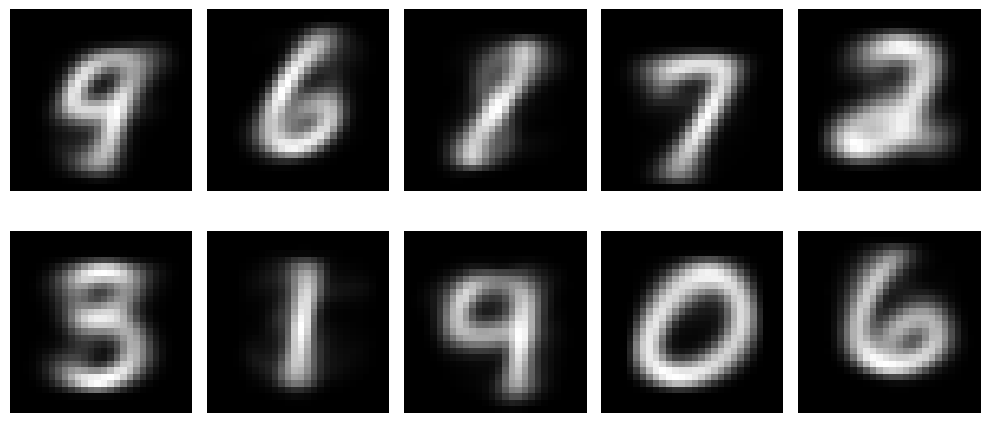

In [147]:
centroides = kmeans.cluster_centers_
fig, axs = plt.subplots(2, 5, figsize=(10, 5))

for i, ax in enumerate(axs.flat):
  imagen_centroide = centroides[i].reshape(28, 28)
  ax.matshow(imagen_centroide, cmap="gray")
  etiqueta = cluster_to_label[i]
  ax.axis("off")

plt.tight_layout()
plt.show()

Ya que el centroide es un punto medio de las imagenes, lo que se observa es que va tomando el mayor valor de las etiquetas y esto hace que en base al algoritmo va variando los valores.

# Ejercicio  3

Haz un análisis completo del dataset del Titanic (lo puedes cargar con la librería seaborn, usando el comando titanic = sns.load_dataset("titanic") que ya te devuelve el dataFrame). El dataset contiene la información de 891 pasajeros del Titanic, en 15 variables entre las que se incluye si obrevivieron o no. Mediante los gráficos y las técnicas que hemos visto en clase, intenta obtener información acerca de los supervivientes.
Consejo: este dataset necesita un cierto preprocesado. Analiza primero la estructura del dataset para entender lo que representa cada variable, de qué tipo son y buscar los missing.

In [148]:
#Importamos el dataset
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score

df = sns.load_dataset("titanic")


In [149]:
#Mostramos los datos del data set
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [150]:
#Mostramos el tipo de variables y buscamos valores faltantes
titanic.info()
titanic.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [151]:
titanic_final = titanic.copy()

#Aplicar edad media en edades vacias
titanic_final['age'] = titanic_final['age'].fillna(titanic_final['age'].median())

#Aplicamos la moda para el puerto de embarque que estan vacios
titanic_final['embark_town'] = titanic_final['embark_town'].fillna(
    titanic_final['embark_town'].mode()[0]
)


#Ahora que ya esta limpia la base, definimos como category para obtener mejores graficos
categoricas = ['sex', 'class', 'who', 'embark_town', 'alive', 'alone']
for col in categoricas:
    titanic_final[col] = titanic_final[col].astype('category')

#Final
titanic_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    category
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    category
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  891 non-null    category
 13  alive        891 non-null    category
 14  alone        891 non-null    category
dtypes: bool(1), category(7), float64(2), int64(4), object(1)
memory usage: 56.9+ KB


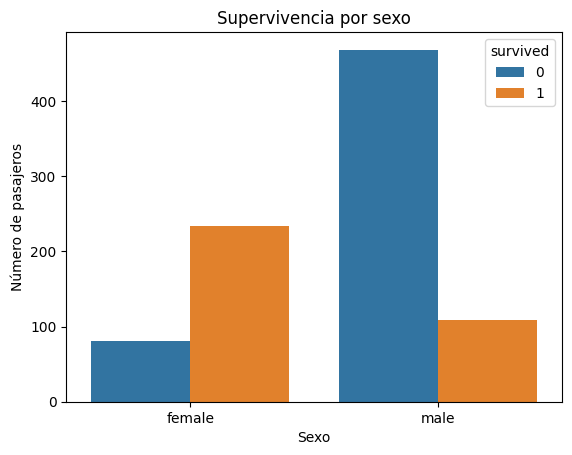

In [152]:
sns.countplot(data=titanic_final, x='sex', hue='survived')
plt.title("Supervivencia por sexo")
plt.xlabel("Sexo")
plt.ylabel("Número de pasajeros")
plt.show()

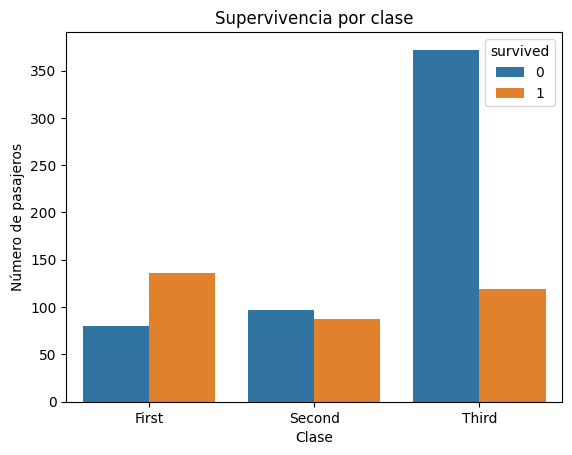

In [153]:
sns.countplot(data=titanic_final, x='class', hue='survived')
plt.title("Supervivencia por clase")
plt.xlabel("Clase")
plt.ylabel("Número de pasajeros")
plt.show()

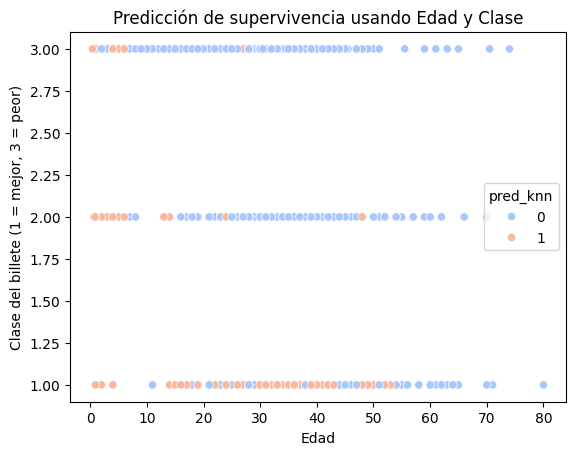


Resultados del modelo KNN (k=5)
Accuracy: 0.7182940516273849
Precision: 0.7724550898203593


In [154]:
#Hacemos un KNN para predecir supervivencia en base a la edad y la cabina

# Tomamos años y tarifas
df_knn = titanic_final[['age', 'pclass', 'survived']].dropna()
X = df_knn[['age', 'pclass']]
y = df_knn['survived']

#Aplicamos Knn
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X, y)
df_knn['pred_knn'] = knn.predict(X)

# Grafico
sns.scatterplot(
    data=df_knn,
    x='age',
    y='pclass',
    hue='pred_knn',
    palette='coolwarm'
)

plt.title("Predicción de supervivencia usando Edad y Clase")
plt.xlabel("Edad")
plt.ylabel("Clase del billete (1 = mejor, 3 = peor)")
plt.show()

print()

# Prediccion del modelo
y_pred = knn.predict(X)
#Calculos de presion
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)

print("Resultados del modelo KNN (k=5)")
print("Accuracy:", accuracy)
print("Precision:", precision)

Podemos concluir que la supervivencia en el Titanic dependía de la clase del billete y del sexo que de la edad. Las mujeres y los pasajeros de primera clase tuvieron muchas más probabilidades de sobrevivir, mientras que los hombres y quienes viajaban en tercera fueron los que no sobrevivieron en su mayoria.
Al aplicar el modelo KNN se confirma esa idea queusando solo edad y clase ya es capaz de predecir bastante bien los sobrevivientes, con una precisión cerca del 71%.